<a href="https://colab.research.google.com/github/scarebats/Machine-Learning-2025/blob/main/JS03_2341720047_AHMAD_NAUFAL_ILHAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **JOBSHEET 3**
# **PRAKTIKUM 1**

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
# Langkah 1 - Load Data
import pandas as pd

dpath = '/content/drive/MyDrive/Colab Notebooks/Machine_Learning_25/Titanic-Dataset.csv'
df = pd.read_csv(dpath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
# Langkah 2 - Pengecekan Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [63]:
# Langkah 3 - Imputasi
# Age - mean
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

# Cabin - "DECK"
df['Cabin'].fillna(value="DECK", inplace=True)

# Embarked - modus
df['Embarked'].fillna(value=df['Embarked'].mode, inplace=True)

/tmp/ipython-input-4090676932.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(value=df['Age'].mean(), inplace=True)
/tmp/ipython-input-4090676932.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [64]:
# Langkah 4 - Validasi Hasil
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,DECK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,DECK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,DECK,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,DECK,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,DECK,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,DECK,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,DECK,C


In [65]:
# Langkah 5 - Ektraksi Fitur
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# === EKSTRAKSI FITUR ===

# 1. FamilySize: jumlah keluarga di kapal (SibSp + Parch + diri sendiri)
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# 2. Title: ambil gelar dari kolom Name (Mr, Mrs, Miss, Master, dll.)
df["Title"] = df["Name"].str.extract(r',\s*([^\.]+)\.', expand=False)
title_mapping = {
    "Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs",
    "Lady": "Rare", "Countess": "Rare", "Capt": "Rare", "Col": "Rare",
    "Don": "Rare", "Dr": "Rare", "Major": "Rare", "Rev": "Rare",
    "Sir": "Rare", "Jonkheer": "Rare", "Dona": "Rare"
}
df["Title"] = df["Title"].replace(title_mapping)

# 3. AgeBin: kelompokkan usia menjadi kategori
df["AgeBin"] = pd.cut(df["Age"], bins=[0, 12, 18, 35, 60, 100],
                      labels=["Child", "Teen", "YoungAdult", "Adult", "Senior"])

# 4. CabinDeck: ambil huruf pertama dari kolom Cabin
df["CabinDeck"] = df["Cabin"].astype(str).str[0]

# 5. Fare per person: bagi harga tiket dengan jumlah keluarga
df["FarePerPerson"] = df["Fare"] / df["FamilySize"]

print("✅ Hasil Ekstraksi fitur ")
df[["Name", "Title", "Age", "AgeBin", "FamilySize", "Cabin", "CabinDeck", "FarePerPerson"]].head()


✅ Hasil Ekstraksi fitur 


,Name,Title,Age,AgeBin,FamilySize,Cabin,CabinDeck,FarePerPerson
0,"Braund, Mr. Owen Harris",Mr,22.0,YoungAdult,2,DECK,D,3.62500
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,38.0,Adult,2,C85,C,35.64165
2,"Heikkinen, Miss. Laina",Miss,26.0,YoungAdult,1,DECK,D,7.92500
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,35.0,YoungAdult,2,C123,C,26.55000
4,"Allen, Mr. William Henry",Mr,35.0,YoungAdult,1,DECK,D,8.05000


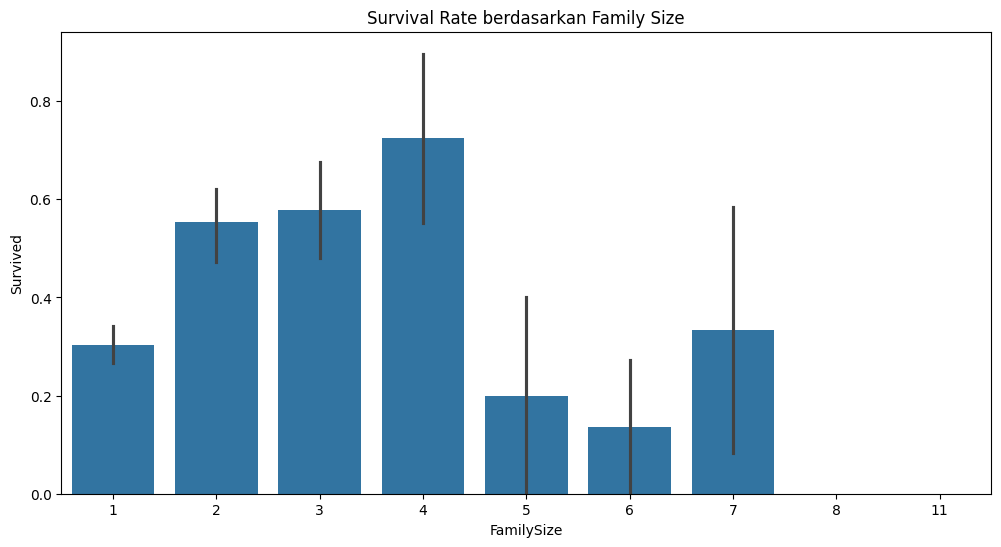

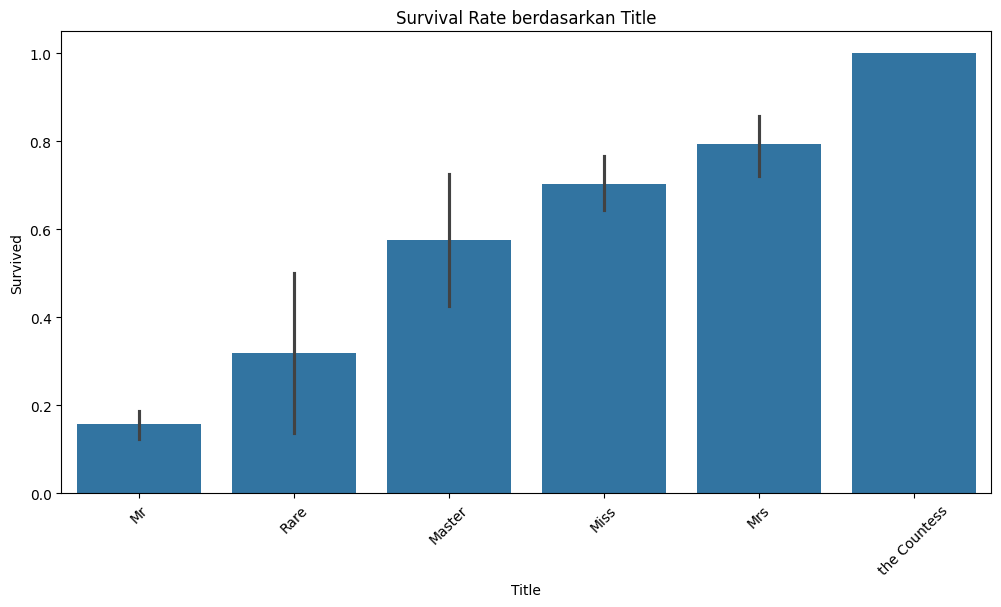

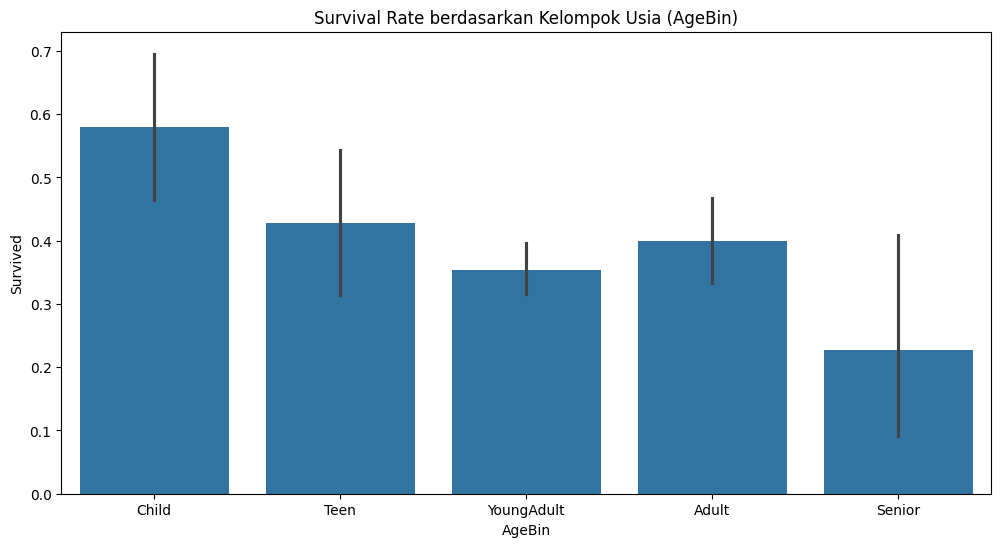

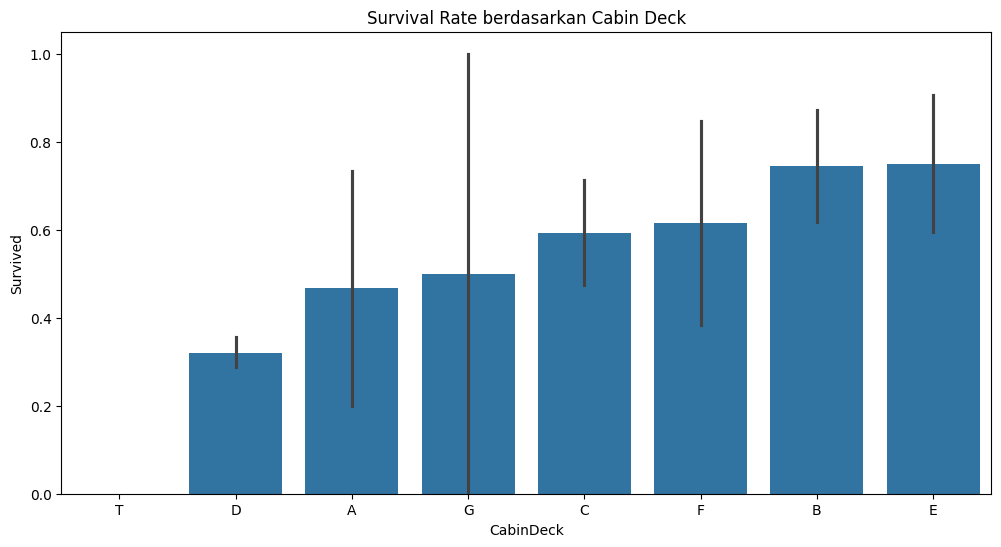

In [67]:
# Langkah 6 - Visualisasi Hasil Ektraksi Fitur
import seaborn as sns
import matplotlib.pyplot as plt

# === VISUALISASI FITUR HASIL EKSTRAKSI ===

plt.figure(figsize=(12, 6))
sns.barplot(x="FamilySize", y="Survived", data=df)
plt.title("Survival Rate berdasarkan Family Size")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Title", y="Survived", data=df,
            order=df.groupby("Title")["Survived"].mean().sort_values().index)
plt.title("Survival Rate berdasarkan Title")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="AgeBin", y="Survived", data=df,
            order=["Child", "Teen", "YoungAdult", "Adult", "Senior"])
plt.title("Survival Rate berdasarkan Kelompok Usia (AgeBin)")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="CabinDeck", y="Survived", data=df,
            order=df.groupby("CabinDeck")["Survived"].mean().sort_values().index)
plt.title("Survival Rate berdasarkan Cabin Deck")
plt.show()


# **PRAKTIKUM 2**

In [68]:
# Langkah 0 - Load Library
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [69]:
# Langkah 1 - Load Data
import pandas as pd

dpath = '/content/drive/MyDrive/Colab Notebooks/Machine_Learning_25/Titanic-Dataset-fixed (1).csv'
df = pd.read_csv(dpath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,DECK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,DECK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,DECK,S


In [70]:
# --- 2. Encoding fitur 'Sex' ---
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
print("=== Hasil Setelah Encoding 'Sex' ===")
print(df[['Sex']].head(), "\n")

=== Hasil Setelah Encoding 'Sex' ===
   Sex
0    1
1    0
2    0
3    0
4    1 



In [71]:
# --- 3. Encoding fitur 'Cabin' ---
df['Cabin'] = df['Cabin'].fillna('Unknown')
print("=== Hasil Setelah Fill NaN pada 'Cabin' ===")
print(df[['Cabin']].head(5), "\n")
df['Cabin'] = df['Cabin'].apply(lambda x: x[0] if x != 'Unknown' else 'U')
print("=== Hasil Ambil huruf pertama 'Cabin' (Deck) ===")
print(df[['Cabin']].head(5), "\n")


=== Hasil Setelah Fill NaN pada 'Cabin' ===
  Cabin
0  DECK
1   C85
2  DECK
3  C123
4  DECK 

=== Hasil Ambil huruf pertama 'Cabin' (Deck) ===
  Cabin
0     D
1     C
2     D
3     C
4     D 



In [72]:
# --- 4. Standarisasi fitur 'Age' ---
df['Age'] = df[['Age']].fillna(df['Age'].median())
print("=== Hasil Setelah Imputasi Data pada Usia dengan median ===")
print(df[['Age']].head(10), "\n")

=== Hasil Setelah Imputasi Data pada Usia dengan median ===
         Age
0  22.000000
1  38.000000
2  26.000000
3  35.000000
4  35.000000
5  29.699118
6  54.000000
7   2.000000
8  27.000000
9  14.000000 



In [73]:
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
print("=== Hasil Setelah Standardisasi 'Age' ===")
print(df[['Age']].head(10), "\n")


=== Hasil Setelah Standardisasi 'Age' ===
        Age
0 -0.592481
1  0.638789
2 -0.284663
3  0.407926
4  0.407926
5  0.000000
6  1.870059
7 -2.131568
8 -0.207709
9 -1.208115 



In [74]:
# --- 5. Cek hasil akhir ---
print("=== Hasil Preprocessing (5 baris pertama) ===")
#print(df[['Sex', 'Cabin', 'Age']].head(5))
df.head()


=== Hasil Preprocessing (5 baris pertama) ===


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.592481,1,0,A/5 21171,7.2500,D,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.638789,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.284663,0,0,STON/O2. 3101282,7.9250,D,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.407926,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",1,0.407926,0,0,373450,8.0500,D,S


In [75]:
#Seleksi Fitur
df = df[['Survived', 'Pclass', 'Age', 'Sex', 'Cabin']]
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,D
1,1,1,0.638789,0,C
2,1,3,-0.284663,0,D
3,1,1,0.407926,0,C
4,0,3,0.407926,1,D


# **PRAKTIKUM 3**

In [76]:
# Random Split
# Langkah 1 - Load Data
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine_Learning_25/Titanic-Dataset-selected.csv')
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


In [77]:
# Langkah 2 - Split Data
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df_train, df_unseen = train_test_split(df, test_size=0.2, random_state=0)

# Split lagi antara validasi dan testing
df_val, df_test = train_test_split(df_unseen, test_size=0.5, random_state=0)

# Cek masing-masing ukuran data

print(f'Jumlah data asli: {df.shape[0]}')
print(f'Jumlah data train: {df_train.shape[0]}')
print(f'Jumlah data val: {df_val.shape[0]}')
print(f'Jumlah data test: {df_test.shape[0]}')

# Cek rasio tiap label
print('=========')
print(f'Jumlah label data asli:\n{df.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df_test.Survived.value_counts()}')

Jumlah data asli: 891
Jumlah data train: 712
Jumlah data val: 89
Jumlah data test: 90
Jumlah label data asli:
Survived
0    549
1    342
Name: count, dtype: int64
Jumlah label data train:
Survived
0    439
1    273
Name: count, dtype: int64
Jumlah label data val:
Survived
0    53
1    36
Name: count, dtype: int64
Jumlah label data test:
Survived
0    57
1    33
Name: count, dtype: int64


In [78]:
# Stratified Split
# Langkah 1 - Load Data
import pandas as pd

df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine_Learning_25/Titanic-Dataset-selected.csv')
df2.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


In [79]:
# Langkah 2 - Split Data
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df2_train, df2_unseen = train_test_split(df2, test_size=0.2, random_state=0, stratify=df['Survived'])

# Split lagi antara validasi dan testing
df2_val, df2_test = train_test_split(df2_unseen, test_size=0.5, random_state=0, stratify=df_unseen['Survived'])

# Cek masing-masing ukuran data

print(f'Jumlah label data asli:\n{df2.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df2_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df2_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df2_test.Survived.value_counts()}')

Jumlah label data asli:
Survived
0    549
1    342
Name: count, dtype: int64
Jumlah label data train:
Survived
0    439
1    273
Name: count, dtype: int64
Jumlah label data val:
Survived
0    51
1    38
Name: count, dtype: int64
Jumlah label data test:
Survived
0    59
1    31
Name: count, dtype: int64


In [80]:
# Cross Validation 1
# Langkah 1 - Load Data
import pandas as pd

df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine_Learning_25/Titanic-Dataset-selected.csv')
df3.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


In [81]:
# Langkah 2 - Split Data
# Implementasi k-fold cross validation (random) dengan training dan testing saja
from sklearn.model_selection import KFold

# inisiasi obyek kfold
kf = KFold(n_splits=4)
print(f'Jumlah fold: {kf.get_n_splits()}')
print(f'Obyek KFold: {kf}')

# Lakukan splitting dengan KFold
kf_split = kf.split(df3)
print(f'Jumlah data df: {df.shape[0]}')

# cek index data tiap fold
for train_index, test_index in kf_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df: 891
Index train: [223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330
 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348
 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366
 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384
 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402
 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420
 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438
 439 440 44

In [82]:
# Cross Validation 2
# Langkah 1 - Load Data
import pandas as pd

df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine_Learning_25/Titanic-Dataset-selected.csv')
df4.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


In [83]:
# Langkah 2 - Split Data
# Implementasi k-fold cross validation (random) dengan training, validation, dan testing data
from sklearn.model_selection import train_test_split, KFold

# Split dulu antara data training dan testing dengan train_test_split
# Rasio 8:2 untuk training dan testing
df4_train, df4_test = train_test_split(df4, test_size=0.2, random_state=0)

# inisiasi obyek kfold
kf2 = KFold(n_splits=4)
print(f'Jumlah fold: {kf2.get_n_splits()}')
print(f'Obyek KFold: {kf2}')

# Lakukan splitting dengan KFold untuk data df_training
# Dengan acara ini, kita masih memiliki data testing untuk keperluan pengujian model
# namun tetap dapat melakukan evaluasi dengan menggunakan data validasi
kf2_split = kf2.split(df_train)
print(f'Jumlah data df_train: {df4_train.shape[0]}')

# cek index data tiap fold
for train_index, test_index in kf2_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df_train: 712
Index train: [178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339
 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357
 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375
 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393
 394 

# **PRAKTIKUM 4**

In [84]:
# Langkah 0 - Instal Pillow
!pip install Pillow

In [85]:
from PIL import Image

img = Image.open('/content/drive/MyDrive/Colab Notebooks/Machine_Learning_25/Lenna.png')
img.show() # tampilkan gambar

In [86]:
# Ekstrak setiap channel red, green, blue
r, g, b = img.split()

# Cek panjang ukuran channel red
print(len(r.histogram()))

# fitur histogram pada channel red
print(r.histogram())

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 8, 6, 10, 9, 20, 37, 32, 41, 53, 74, 103, 132, 179, 193, 242, 238, 336, 386, 404, 483, 607, 628, 771, 785, 1001, 1016, 1177, 1269, 1332, 1446, 1487, 1457, 1574, 1585, 1591, 1557, 1569, 1660, 1648, 1420, 1559, 1418, 1384, 1319, 1342, 1156, 1120, 955, 969, 828, 782, 752, 737, 719, 700, 628, 673, 587, 617, 610, 592, 557, 593, 552, 566, 582, 559, 571, 520, 664, 650, 618, 730, 594, 667, 675, 685, 771, 715, 667, 740, 744, 766, 765, 772, 817, 817, 744, 806, 760, 777, 812, 797, 799, 861, 814, 910, 907, 918, 888, 1011, 879, 996, 912, 952, 884, 1074, 977, 1073, 1040, 1216, 1250, 1403, 1534, 1639, 1682, 1776, 1874, 1769, 1582, 1743, 1441, 1477, 1483, 1409, 1437, 1449, 1389, 1479, 1592, 1655, 1657, 1666, 1857, 1896, 1813, 1979, 1814, 1956, 1928, 2055, 2012, 2303, 2333, 2670, 2787, 3232, 3154, 3476, 3424, 3516, 3102, 31

# **TUGAS PRAKTIKUM**
Pada tugas pratikum ini Anda akan menggunakan data "Wisconsin Breast Cancer". Data tersebut terdiri dari 569 data yang digunakan untuk mendiagnonis jenis kanker Malignant (M) dan Benign (B). Tugas Anda adalah,
1. Pisahkan antara variabel yang dapat digunakan dan variabel yang tidak dapat digunakan.
2. Lakukan proses encoding pada kolom "diagnosis".
3. Lakukan proses standarisasi pada semua kolom yang memiliki nilai numerik.
4. Lakukan proses stratified split data untuk membuat data latih dan data uji dengan rasio 80:20.

In [87]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [88]:
dpath = '/content/drive/MyDrive/Colab Notebooks/Machine_Learning_25/wbc.csv'
df = pd.read_csv(dpath)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [89]:
# Soal 1
df_clean = df.drop(columns=['id', 'Unnamed: 32'])
df_clean.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [90]:
# Soal 2
from sklearn.preprocessing import LabelEncoder

# Salin DataFrame agar data asli tetap aman
df_encoded = df_clean.copy()

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Buat kolom baru hasil encoding
df_encoded['diagnosis_encoded'] = le.fit_transform(df_encoded['diagnosis'])

# Tampilkan hasil
print(df_encoded[['diagnosis', 'diagnosis_encoded']].head())

# Lihat mapping label -> angka
print("\nMapping label ke angka:")
print(dict(zip(le.classes_, le.transform(le.classes_))))

  diagnosis  diagnosis_encoded
0         M                  1
1         M                  1
2         M                  1
3         M                  1
4         M                  1

Mapping label ke angka:
{'B': np.int64(0), 'M': np.int64(1)}


In [91]:
df_encoded = df_clean.copy()
le = LabelEncoder()
df_encoded['diagnosis'] = le.fit_transform(df_encoded['diagnosis'])
df_encoded.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [92]:
# Soal 3
df_std = df_encoded.copy()
scaler = StandardScaler()
numeric_cols = df_std.drop(columns=['diagnosis']).columns
df_std[numeric_cols] = scaler.fit_transform(df_std[numeric_cols])
df_std.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [93]:
# Soal 4
# Salin data
df_proc = df_clean.copy()

# Encoding kolom diagnosis (tanpa menimpa kolom asli)
le = LabelEncoder()
df_proc['diagnosis_encoded'] = le.fit_transform(df_proc['diagnosis'])

# Standarisasi semua kolom numerik
numeric_cols = df_proc.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_proc[numeric_cols] = scaler.fit_transform(df_proc[numeric_cols])

# Pisahkan fitur (X) dan target (y)
X = df_proc.drop(columns=['diagnosis', 'diagnosis_encoded'])  # fitur
y = df_proc['diagnosis_encoded']                              # target

# Stratified split 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Cek hasil
print("Ukuran data latih :", X_train.shape)
print("Ukuran data uji   :", X_test.shape)

print("\nDistribusi kelas di data latih:")
print(y_train.value_counts(normalize=True))

print("\nDistribusi kelas di data uji:")
print(y_test.value_counts(normalize=True))

# Mapping label diagnosis
print("\nMapping label diagnosis:", dict(zip(le.classes_, le.transform(le.classes_))))

Ukuran data latih : (455, 30)
Ukuran data uji   : (114, 30)

Distribusi kelas di data latih:
diagnosis_encoded
-0.770609    0.626374
 1.297676    0.373626
Name: proportion, dtype: float64

Distribusi kelas di data uji:
diagnosis_encoded
-0.770609    0.631579
 1.297676    0.368421
Name: proportion, dtype: float64

Mapping label diagnosis: {'B': np.int64(0), 'M': np.int64(1)}
